# Developing an AI-Driven Financial Trading Algorithm

In today's rapidly evolving financial markets, the integration of artificial intelligence (AI) and machine learning has revolutionized how trades are executed, risks are managed, and profits are maximized. Traditional trading strategies, which rely heavily on technical and fundamental analysis, often struggle to keep pace with the unpredictable volatility of modern financial markets. To address this challenge, this project aims to develop a comprehensive trading algorithm using Reinforcement Learning (RL) and Machine Learning (ML) models, with a focus on balancing risk minimization and profit maximization. The project will be built within a custom gym environment, facilitating the application of AI to dynamically predict stock price movements and optimize trading decisions.

#### Objective
The core objective of this project is to design and implement a financial algorithm capable of autonomously making trading decisions that balance risk and reward. The algorithm will be based on historical stock price data and will utilize advanced machine learning and reinforcement learning techniques to predict future stock behavior. Key aspects of the project include:

- Minimizing Risk: Implementing sophisticated risk management tools like dynamic stop-loss mechanisms, Value-at-Risk (VaR), and Kelly Criterion for position sizing to prevent substantial losses.
  
- Maximizing Profit: Designing an algorithm that captures upward market movements through take-profit mechanisms and trend-following strategies, using predictive models to identify optimal buy and sell points.
  
- Combining Both: Creating a balanced, adaptive trading system that effectively manages risk while maximizing profits, ensuring long-term portfolio growth.
  
#### Significance of the Project
In financial markets, the greatest challenge is achieving consistent returns while minimizing risk exposure. Traditional methods often fall short of addressing the complexity of the markets, leading to unbalanced strategies that either focus too much on minimizing risk or chasing profits without sufficient risk controls. This project addresses these challenges by leveraging machine learning to analyze past price data and predict future movements, combined with reinforcement learning (RL) to allow the algorithm to learn from its actions and adapt over time.

The project’s significance lies in its potential to outperform traditional trading strategies by utilizing cutting-edge AI technologies, which can dynamically react to new information and optimize trades in real-time. This is particularly important as financial markets become more complex, with increased volumes, volatility, and information flow. By integrating supervised learning for stock price prediction and reinforcement learning for trade optimization, the project aims to achieve superior returns while maintaining strict control over risk.

#### Methodology
The project is divided into three key phases:

##### 1. Minimizing Risk

Effective risk management is the foundation of any successful trading strategy. In this phase, the algorithm incorporates:

- Stop-Loss Mechanisms: Automatically exiting trades when prices fall below a predefined threshold to protect the portfolio from large losses.
  
- Position Sizing Techniques: Using methods like the Kelly Criterion and Value-at-Risk (VaR) to determine the optimal amount of capital to allocate to each trade, minimizing the potential for large drawdowns.
  
- Dynamic Risk Adjustments: Implementing a trailing stop-loss that adjusts as the stock price moves upward, locking in gains while limiting exposure to downside risk.

##### 2. Maximizing Profit

To achieve strong returns, the algorithm will:

- Take-Profit Mechanisms: Automatically exiting trades when a certain profit threshold is reached, allowing the algorithm to capture gains while minimizing overexposure to market reversals.

- Trend-Following Strategies: Utilizing machine learning models to identify and capitalize on long-term trends in stock prices, ensuring the algorithm rides the momentum of upward-moving markets.

- Predictive Modeling: Using supervised learning techniques (such as random forests, gradient boosting, and linear regression) to forecast stock price movements based on historical data, improving the accuracy of buy and sell decisions.

#####  3. Balancing Both: A Gym Environment for Reinforcement Learning (RL)

The third phase of the project focuses on creating a custom gym environment for applying Reinforcement Learning (RL) algorithms, where the trading agent can learn from its interactions with the market:

- Gym Environment: A simulated trading environment will be built where the agent can take actions (buy, sell, hold) and receive rewards (profit, loss) based on the results of those actions. This environment will replicate real-world market conditions, allowing the RL agent to learn by trial and error.
  
- Reinforcement Learning Models: Algorithms like Deep Q-Networks (DQN), Proximal Policy Optimization (PPO), and Advantage Actor-Critic (A2C) will be employed to optimize the trading strategy by maximizing cumulative rewards over time.

- Adaptive Learning: Through continuous interaction with the gym environment, the RL agent will learn to optimize its trading strategy, dynamically adjusting to market conditions and improving its decision-making processes.
Evaluation Metrics

To evaluate the success of the algorithm, the following metrics will be used:

- Return on Investment (ROI): To measure the overall profitability of the strategy.
  
- Sharpe Ratio: To assess risk-adjusted returns, ensuring the algorithm balances profit and risk.
  
- Max Drawdown: To evaluate the largest observed loss from peak to trough, reflecting the algorithm’s risk exposure.
  
- Reinforcement Learning Performance: Metrics such as cumulative reward and episode length will be tracked to evaluate the RL agent’s learning and adaptation over time.

Expected Outcomes: 
By combining supervised learning for stock price prediction and reinforcement learning for decision-making, the algorithm is expected to:

- Generate consistent profits: Achieving steady returns by accurately predicting market trends and optimizing trading decisions.
  
- Minimize significant risks: Through effective stop-loss mechanisms, position sizing, and dynamic adjustments to market conditions.

- Adapt to new market environments: The RL agent will continually learn and adjust its trading strategies, ensuring the algorithm performs well even in volatile and unpredictable markets.
  
#### Conclusion

This project will develop a robust AI-powered financial trading algorithm that effectively combines risk minimization with profit maximization. By leveraging the power of machine learning and reinforcement learning, the algorithm is designed to continuously learn and improve, making it adaptable to future market conditions. The results of this project will contribute to the field of algorithmic trading and highlight the potential of AI-driven decision-making in finance.

* High frequency trading
* AI - HFT

## First step : Data Collection


Key take aways : 
- Use a financial API to download historical stock data.

- Focus on multi-dimensional data such as prices, technical indicators (volume)

- (Split the data into training, validation, and test sets.)

In [828]:
# Install the environmment to import the data 

!pip install numpy pandas matplotlib tensorflow keras gym alpha_vantage

In [829]:
#import all the needed librairies to complete this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

In [830]:
# Import the data

from alpha_vantage.timeseries import TimeSeries
import pandas as pd

api_key = 'K642JFH9X7S284LC'
function = 'TIME_SERIES_INTRADAY'
symbol = 'IBM'   
outputsize = 'compact' 

ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')

# Inspect the data
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-10-22,233.84,236.19,232.61,235.86,38512575.0
2024-10-21,234.45,236.85,234.45,236.48,36254470.0
2024-10-18,236.18,236.18,234.01,235.00,46431472.0
2024-10-17,233.43,233.85,230.52,232.15,32993810.0
2024-10-16,231.60,232.12,229.84,231.78,34082240.0
...,...,...,...,...,...
1999-11-05,84.62,88.37,84.00,88.31,3721500.0
1999-11-04,82.06,85.37,80.62,83.62,3384700.0
1999-11-03,81.62,83.25,81.00,81.50,2932700.0


As we can see the data below represent historical stock market prices. Here's a breakdown of each single column for a better understanding of the data:
- date: The date on which the stock market data was recorded. Each row corresponds to one trading day.
- open: The price at which the stock or asset opened trading on that particular day.
- high: The highest price the stock reached during that trading day.
- low: The lowest price the stock reached during that trading day.
- close: The price at which the stock closed trading for the day. This is often used in financial algorithms as a key indicator of a stock’s performance.
- volume: The total number of shares that were traded on that particular day. High volume typically indicates strong interest in the stock.

In [832]:
meta_data #Provide information about the imported data 

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2024-10-22',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [833]:
# Check for missing values within the data set

missing_values = data.isnull().sum()
print(missing_values) # No missing values in the data

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64


In [834]:
# Data Cleaning / filtering
# We are working within a 5 year time range since we adopting a long term time horizon for our algorithm, so we are only selecting values
# from 2019/01/02 to 2024/01/02

data.index = pd.to_datetime(data.index)
data = data.sort_index()

start_date = '2019-01-02'
end_date = '2024-01-02'

filtered_df = data.loc[start_date:end_date]

filtered_df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-01-02,154.89,158.85,154.230,157.92,37039737.0
2019-01-03,143.98,145.72,142.000,142.19,91312195.0
2019-01-04,144.53,148.55,143.800,148.26,58607070.0
2019-01-07,148.70,148.83,145.900,147.93,54777764.0
2019-01-08,149.56,151.82,148.520,150.75,41025314.0
...,...,...,...,...,...
2023-12-26,193.61,193.89,192.830,193.05,28919310.0
2023-12-27,192.49,193.50,191.090,193.15,47899806.0
2023-12-28,194.14,194.66,193.170,193.58,34049898.0


We filtered our data to work with indices within the 5 year range as we aim for a more longterm horizon. We will now compute a study to fill 3 objectives:
- risk minimizing financial algorithm
- profit maximize financial algorithm
- balance between both

## Minimizing risk

In [837]:
print(filtered_df.columns)

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')


In [838]:
df = filtered_df.rename(columns={
    'date': 'date', 
    '1. open': 'open', 
    '2. high': 'high', 
    '3. low': 'low', 
    '4. close': 'close', 
    '5. volume': 'volume'
})

df #Data cleaned and ready for use 

,open,high,low,close,volume
date,,,,,
2019-01-02,154.89,158.85,154.230,157.92,37039737.0
2019-01-03,143.98,145.72,142.000,142.19,91312195.0
2019-01-04,144.53,148.55,143.800,148.26,58607070.0
2019-01-07,148.70,148.83,145.900,147.93,54777764.0
2019-01-08,149.56,151.82,148.520,150.75,41025314.0
...,...,...,...,...,...
2023-12-26,193.61,193.89,192.830,193.05,28919310.0
2023-12-27,192.49,193.50,191.090,193.15,47899806.0
2023-12-28,194.14,194.66,193.170,193.58,34049898.0


In [839]:
# 1. Calculate daily returns + adding a return col to our data set
df['return'] = df['close'].pct_change()

#### Interpretation 

- **Daily returns** measure the percentage change in the price of a stock (or the portfolio value) from one day to the next. It’s essentially a way to quantify the day-to-day performance of an asset.
In financial terms, returns give you insight into how much profit or loss has been made over a certain period based on the price movement.

1. Performance measure : In our study, the daily returns represent a metric to evaluate risk  by calculating the day to day change in the value of the stock. **By calculating the daily returns we can determine how much we are gaining or losing in a day to day basis.**

2. Risk Management: When calculating metrics like volatility or the Sharpe Ratio, daily returns are essential. For instance:
   - **Volatility** is typically calculated as the standard deviation of daily returns. This gives you an idea of how much the stock price fluctuates on a daily basis.
   - **Sharpe Ratio:** When you evaluate the risk-adjusted performance of your strategy, you use the average daily return divided by the standard deviation of daily returns.
  
3. Input for Decision-Making:
- In your algorithm, daily returns are used to determine whether the portfolio is increasing or decreasing in value.
- They are also integral to calculating portfolio value over time and cumulative returns, which you used to evaluate how much the portfolio grew from 2019 to 2024.

In [841]:
# 2. Calculate volatility (standard deviation of returns) over a rolling window
df['volatility'] = df['return'].rolling(window=30).std()
threshold = df['volatility'].quantile(0.50)

df = df.dropna(subset=['volatility'])

# 2.5 Filter for stocks with low volatility
low_volatility_stocks = df[df['volatility'] < threshold]

df

,open,high,low,close,volume,return,volatility
date,,,,,,,
2019-02-14,169.71,171.26,169.380,170.80,21835747.0,0.003643,0.027108
2019-02-15,171.25,171.70,169.750,170.42,24626814.0,-0.002225,0.019025
2019-02-19,169.71,171.44,169.490,170.93,18972826.0,0.002993,0.017739
2019-02-20,171.19,173.32,170.990,172.03,26114362.0,0.006435,0.017689
2019-02-21,171.80,172.37,170.300,171.06,17249670.0,-0.005639,0.017596
...,...,...,...,...,...,...,...
2023-12-26,193.61,193.89,192.830,193.05,28919310.0,-0.002841,0.008473
2023-12-27,192.49,193.50,191.090,193.15,47899806.0,0.000518,0.008271
2023-12-28,194.14,194.66,193.170,193.58,34049898.0,0.002226,0.007913


#### Interpretation 

**Volatility** is calculated based on the daily returns, typically as the standard deviation of daily returns over a specific period.
- **Higher volatility** means that the daily returns fluctuate more, which can indicate **higher risk.**

In [843]:
df['volatility'].describe()

count    1229.000000
mean        0.021096
std         0.020357
min         0.007913
25%         0.012633
50%         0.016829
75%         0.021118
max         0.140856
Name: volatility, dtype: float64

#### Interpretation 

- count: 1229 observations have non-null volatility values (after calculating a rolling 30-day standard deviation).
- mean (0.0211): The average volatility is 2.11%. This indicates that, on average, the price of the asset fluctuates by 2.11% over the 30-day window.
- std (0.0204): The standard deviation of volatility itself is 2.04%. This measures how spread out the volatility values are.
- min (0.0079): The minimum volatility observed is 0.79%. This is quite low, indicating that there are periods with very little price movement.
- 25% (0.0126): The 25th percentile is at 1.26%. This means that 25% of the time, volatility is below this value, and you could use this to filter for low-volatility stocks.
- 50% (0.0168): The median volatility is 1.68%. Half the time, volatility is below 1.68%, which is consistent with a relatively stable asset class.
- 75% (0.0211): The 75th percentile is at 2.11%, meaning that 75% of the time, volatility is below this value.
max (0.1409): The maximum volatility is 14.09%, which is quite high, indicating that there are periods of significant price swings.


In [845]:
# Use the median volatility as the threshold (or slightly below it)
threshold = df['volatility'].quantile(0.50)  # 1.68%

# Filter low-volatility stocks
low_volatility_stocks = df[df['volatility'] < threshold]

# Check how many rows are left after filtering
print(f"Filtered dataset contains {len(low_volatility_stocks)} rows.")


Filtered dataset contains 614 rows.


#### Interpretation 

- **Threshold:** Median volatility of the data set to establish what is low volatility and high volatility. **Median volatility = 1.68%.**
    - The value at which half the stocks have lower volatility and half have higher volatility
    - By filtering the data set into **low volatility** only, we focus on a the **more stable** stocks that tend to fluctuates less
    - Remember: **High volatility = High risk**

- **Filtering:** filtered the dataset to keep only stocks with volatility lower than the median, effectively focusing on low-volatility, lower-risk stocks.
  
- **Dataset Size:** After filtering, you now have **614 rows** of low-volatility stocks.

In [847]:
# Define stop-loss percentage
stop_loss_percent = 0.02  # Set to 2%

# Calculate the stop-loss price (98% of the current close price)
low_volatility_stocks.loc[:, 'stop_loss'] = low_volatility_stocks['close'] * (1 - stop_loss_percent)

# Generate an exit signal if the price drops below the stop-loss
low_volatility_stocks.loc[:, 'exit_signal'] = low_volatility_stocks['close'] < low_volatility_stocks['stop_loss']

# Check if any exit signals were triggered
print(low_volatility_stocks['exit_signal'].value_counts())

exit_signal
False    614
Name: count, dtype: int64


/var/folders/dg/ks7454494w193jd09h3m8mfh0000gn/T/ipykernel_13618/534749085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_volatility_stocks.loc[:, 'stop_loss'] = low_volatility_stocks['close'] * (1 - stop_loss_percent)
/var/folders/dg/ks7454494w193jd09h3m8mfh0000gn/T/ipykernel_13618/534749085.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_volatility_stocks.loc[:, 'exit_signal'] = low_volatility_stocks['close'] < low_volatility_stocks['stop_loss']


#### Interpretation:

- **Stop loss:** We are excluding all the trades that fall below a certain percentage or thresold. In this case, if the trade fall by 2% below its current value.

- **Exit signal:** Calculate the stop-loss price and generate an exit signal when the stock price falls below the stop-loss price.

- **Exit Decision:** In this case, all 614 rows (low-volatility stocks) currently have no exit signal (False), meaning none of the stocks dropped below the stop-loss threshold.

In [849]:
# Check the stop-loss prices and exit signals, keeping the index (date) in view
print(low_volatility_stocks[['close', 'stop_loss', 'exit_signal']])

             close  stop_loss  exit_signal
date                                      
2019-03-06  174.52   171.0296        False
2019-03-07  172.50   169.0500        False
2019-03-08  172.91   169.4518        False
2019-03-11  178.90   175.3220        False
2019-03-12  180.91   177.2918        False
...            ...        ...          ...
2023-12-26  193.05   189.1890        False
2023-12-27  193.15   189.2870        False
2023-12-28  193.58   189.7084        False
2023-12-29  192.53   188.6794        False
2024-01-02  185.64   181.9272        False

[614 rows x 3 columns]


In [850]:
# Adjust stop-loss percentage to 5%
stop_loss_percent = 0.05 

# Calculate the stop-loss price (98% of the current close price)
low_volatility_stocks.loc[:, 'stop_loss'] = low_volatility_stocks['close'] * (1 - stop_loss_percent)

# Generate an exit signal if the price drops below the stop-loss
low_volatility_stocks.loc[:, 'exit_signal'] = low_volatility_stocks['close'] < low_volatility_stocks['stop_loss']

# Check if any exit signals were triggered
print(low_volatility_stocks['exit_signal'].value_counts())

exit_signal
False    614
Name: count, dtype: int64


The fact that all 614 rows are False suggests that the stop-loss condition hasn't been triggered for any of the low-volatility stocks. Increasing the stop-loss percentage and visualizing the data should help you identify if the threshold is too tight or if your dataset is naturally very stable.

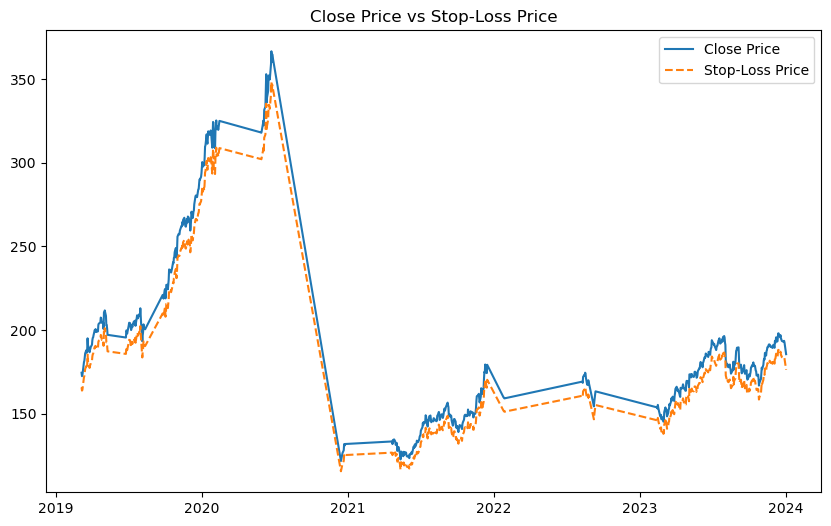

In [852]:
# Plot close vs stop-loss for a quick visual check
plt.figure(figsize=(10, 6))
plt.plot(low_volatility_stocks.index, low_volatility_stocks['close'], label='Close Price')
plt.plot(low_volatility_stocks.index, low_volatility_stocks['stop_loss'], label='Stop-Loss Price', linestyle='--')
plt.title('Close Price vs Stop-Loss Price')
plt.legend()
plt.show()


#### Graph interpretation 

The close price (blue line) represents the actual price of the stocks while the stop loss line (orange dashed line) represents the 2% threshold below the the close price line, which means that it always stays 2% below that line.

#### Understanding the behavior 

1) Rising Market:
- As we can see, the stock prices rises steadily from 2019 to mid 2020.

2) Sharp Drop:
- The stock experiences a sharp drop from mid 2020 to early 2021, with both lines falling drastically during that time period.

3) Volatile Markets:
- From 2022 to 2024, the market stays relatively volatile, where we can see that the closing price fluctuates both upwards and downwards, and the stop-loss adjusts accordingly.

In [891]:
# Adjust stop-loss percentage to 10%
stop_loss_percent = 0.10

# Calculate the stop-loss price (98% of the current close price)
low_volatility_stocks.loc[:, 'stop_loss'] = low_volatility_stocks['close'] * (1 - stop_loss_percent)

# Generate an exit signal if the price drops below the stop-loss
low_volatility_stocks.loc[:, 'exit_signal'] = low_volatility_stocks['close'] < low_volatility_stocks['stop_loss']

# Check if any exit signals were triggered
print(low_volatility_stocks['exit_signal'].value_counts())
print(low_volatility_stocks[['close', 'stop_loss', 'exit_signal']].head())

exit_signal
False    614
Name: count, dtype: int64
             close  stop_loss  exit_signal
date                                      
2019-03-06  174.52    157.068        False
2019-03-07  172.50    155.250        False
2019-03-08  172.91    155.619        False
2019-03-11  178.90    161.010        False
2019-03-12  180.91    162.819        False


#### Interpretation 

- The graph shows a large, sharp drop in the stock price during 2020-2021, which suggests that the stocks were not as stable or low-risk as initially thought.

- The reason why the stop-loss didn’t trigger, despite this significant drop, is likely related to how the stop-loss mechanism is calculated and adjusted. The stop-loss adjusts to track the closing price and may not have been breached by the drop in the stock prices because the decline was relatively gradual over time.

- The stop-loss strategy didn’t trigger any exits, not because of stock stability, but because the drop was gradual, and the stop-loss followed the close price without creating a large enough gap to trigger an exit signal. Which is the reason why we keep getting 614 false values for the exit_signal and no True values


- the stop-loss didn't trigger despite the large drop because the stop-loss price was tracking the closing price closely, not leaving enough room to hit the exit point. This suggests that while your stop-loss strategy was effective in following the price, it may not be suitable for capturing risk in gradual downtrends. You can move forward with this understanding, document it, and adjust your risk management approach later if necessary.

As we can see, even when changing the stop loss percent value, we keep getting 614 false values for the exit_signal and no True values which basically means that 

/var/folders/dg/ks7454494w193jd09h3m8mfh0000gn/T/ipykernel_13618/3396309226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_volatility_stocks['return'] = low_volatility_stocks['close'].pct_change()
/var/folders/dg/ks7454494w193jd09h3m8mfh0000gn/T/ipykernel_13618/3396309226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_volatility_stocks['cumulative_return'] = (1 + low_volatility_stocks['return']).cumprod()


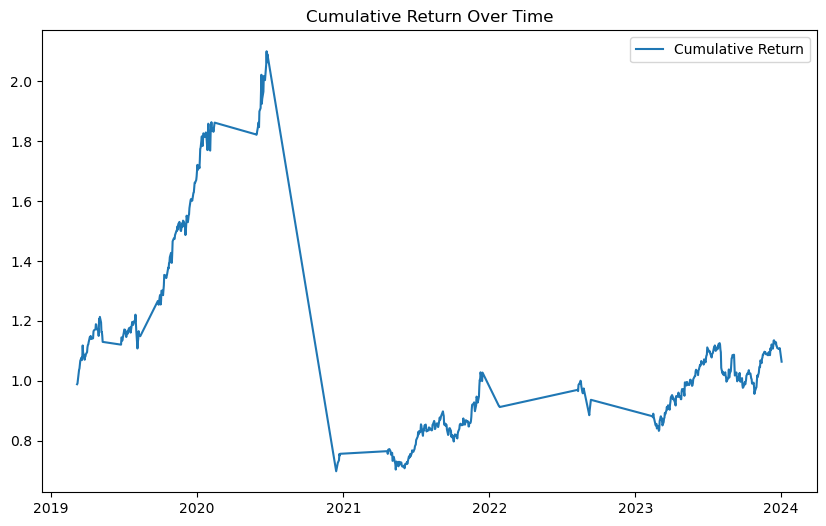

/var/folders/dg/ks7454494w193jd09h3m8mfh0000gn/T/ipykernel_13618/3396309226.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_volatility_stocks['running_max'] = low_volatility_stocks['cumulative_return'].cummax()
/var/folders/dg/ks7454494w193jd09h3m8mfh0000gn/T/ipykernel_13618/3396309226.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_volatility_stocks['drawdown'] = (low_volatility_stocks['cumulative_return'] - low_volatility_stocks['running_max']) / low_volatility_stocks['running_max']


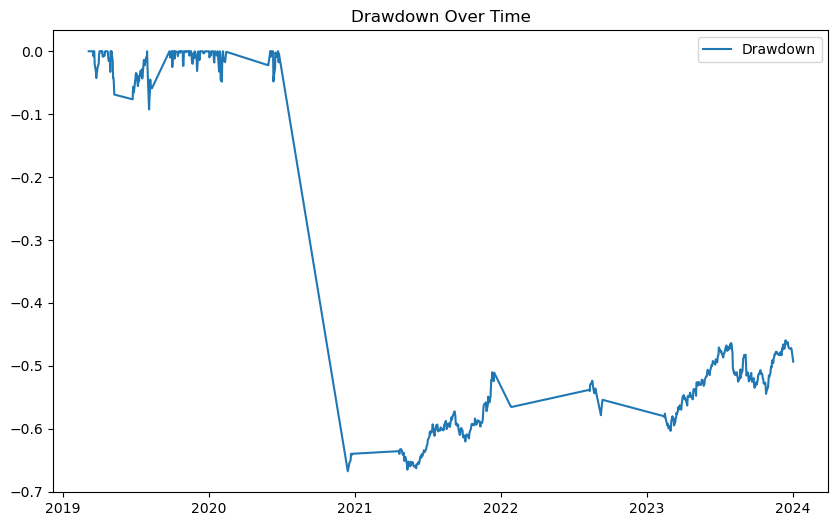

Maximum Drawdown: -66.77%


In [893]:
low_volatility_stocks['return'] = low_volatility_stocks['close'].pct_change()
#print(low_volatility_stocks[['close', 'return']].head(10))  # Print first 10 rows to verify

low_volatility_stocks['cumulative_return'] = (1 + low_volatility_stocks['return']).cumprod()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(low_volatility_stocks.index, low_volatility_stocks['cumulative_return'], label='Cumulative Return')
plt.title("Cumulative Return Over Time")
plt.legend()
plt.show()

low_volatility_stocks['running_max'] = low_volatility_stocks['cumulative_return'].cummax()
low_volatility_stocks['drawdown'] = (low_volatility_stocks['cumulative_return'] - low_volatility_stocks['running_max']) / low_volatility_stocks['running_max']

# Plotting the drawdown over time
plt.figure(figsize=(10, 6))
plt.plot(low_volatility_stocks.index, low_volatility_stocks['drawdown'], label='Drawdown')
plt.title("Drawdown Over Time")
plt.legend()
plt.show()

max_drawdown = low_volatility_stocks['drawdown'].min()
print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")



#### Interpretation:

1) Calculating the Drawdown

**Drawdown** measures how much the stock's value has fallen from its peak value at any point in time. It's calculated as the percentage decline from the running maximum to the current cumulative return. **This shows how much the stock has dropped from its peak.**

- This means that at some point, the stock experienced a drop of around **66.77%** from its peak cumulative return value. This is a significant drawdown and would indicate a **major risk exposure during that time.**

In [895]:
# Check for NaN values in the return column
print(low_volatility_stocks['return'].isna().sum())

# Fill NaN values in the return column with zero (if needed)
low_volatility_stocks['return'] = low_volatility_stocks['return'].fillna(0)

1


/var/folders/dg/ks7454494w193jd09h3m8mfh0000gn/T/ipykernel_13618/376826993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_volatility_stocks['return'] = low_volatility_stocks['return'].fillna(0)


#### Interpretation

Checks how many NaNs values we have in the return column. It's essential to know whether there are any missing values before proceeding with calculations like cumulative return. We can see that we have 0 missing values for the return column in the data set, and if we did we would replace it by a 0, so it wouldn't have any impact (0%) and represent no change in the stock prices for that day.

In [897]:
# Step 3: Backtest the strategy

# Initialize starting capital
initial_balance = 100000  # Assume starting with $100,000
balance = initial_balance

# Define variables to track trades
position_size = balance / len(low_volatility_stocks)  # Equal position size for each asset
balances = []  # To store portfolio balance over time

# Simulate trading for each row in the dataset
for index, row in low_volatility_stocks.iterrows():
    if row['exit_signal']:
        # Exit trade when stop-loss is triggered
        loss = (row['close'] - row['stop_loss']) / row['close']  # Percentage loss
        balance -= balance * abs(loss)  # Update balance with loss
    else:
        # If no exit signal, assume a normal return on the day
        balance += balance * row['return']  # Update balance with daily return
    
    # Append the current balance to the list
    balances.append(balance)

# Convert balances into a series for easy plotting and visualization
low_volatility_stocks['portfolio_value'] = balances

# Display the final portfolio balance after backtest
print(f"Final portfolio balance after backtest: ${balance:.2f}")


Final portfolio balance after backtest: $106371.76


/var/folders/dg/ks7454494w193jd09h3m8mfh0000gn/T/ipykernel_13618/1155965586.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_volatility_stocks['portfolio_value'] = balances


#### Interpretation

The **backtest strategy** is a way to track the evolution of our portfolio with an intial balance. In this case we are initializing our balance to be 100000 and tracking the evolution of that same value within the 5 year range of our investement as the trades are simulated. 

- **"Would it go up or down?"**

The code prints out the **final portfolio balance** after the backtest is completed, which in our case is $106,371.76.

- This means that over the period of the backtest (2019-2024), your trading strategy resulted in a modest gain of approximately **6.37%.**

- Given that the backtest included low volatility stocks, this modest gain might reflect a **low-risk/low-reward strategy**, which is reasonable since the market was relatively stable, and the stocks we analyzed did not have extreme fluctuations.

In [899]:
starting_value = 100000
ending_value = 106371.76
years = 5

cagr = (ending_value / starting_value) ** (1 / years) - 1
print(f"Compound Annual Growth Rate (CAGR): {cagr * 100:.2f}%")

Compound Annual Growth Rate (CAGR): 1.24%


## Maximizing profit

In [901]:
# Set the threshold for high volatility (e.g., top 25%)
volatility_threshold = df['volatility'].quantile(0.75)

# Filter high-volatility stocks
high_volatility_stocks = df[df['volatility'] > volatility_threshold]
print(f"Filtered dataset contains {len(high_volatility_stocks)} rows.")

Filtered dataset contains 307 rows.


In [907]:
# Calculate the highest price (cumulative maximum of close prices)
high_volatility_stocks.loc[:, 'highest_price'] = high_volatility_stocks['close'].cummax()

# Calculate the trailing stop-loss price (based on the highest price)
high_volatility_stocks.loc[:, 'trailing_stop_loss'] = high_volatility_stocks['highest_price'] * (1 - trailing_stop_loss_percent)

# Calculate the take-profit price (based on the close price)
high_volatility_stocks.loc[:, 'take_profit_price'] = high_volatility_stocks['close'] * (1 + take_profit_percent)

# Generate an exit signal if the close price hits either the stop-loss or take-profit price
high_volatility_stocks.loc[:, 'exit_signal'] = (high_volatility_stocks['close'] < high_volatility_stocks['trailing_stop_loss']) | \
                                                (high_volatility_stocks['close'] > high_volatility_stocks['take_profit_price'])

# Display the relevant columns to verify the logic
print(high_volatility_stocks[['close', 'trailing_stop_loss', 'take_profit_price', 'exit_signal']].head(10))


             close  trailing_stop_loss  take_profit_price  exit_signal
date                                                                  
2019-02-14  170.80             153.720            204.960        False
2019-06-07  190.15             171.135            228.180        False
2019-06-10  192.58             173.322            231.096        False
2019-06-11  194.81             175.329            233.772        False
2019-06-12  194.19             175.329            233.028        False
2019-09-11  223.59             201.231            268.308        False
2019-09-12  223.09             201.231            267.708        False
2019-09-13  218.75             201.231            262.500        False
2020-02-27  273.52             246.168            328.224        False
2020-02-28  273.36             246.168            328.032        False


In [913]:
# Initialize starting capital
initial_balance = 100000  # Assume starting with $100,000
balance = initial_balance
balances = []  # To store portfolio balance over time
position_size = balance / len(high_volatility_stocks)  # Equal position size for each asset

# Simulate trading for each row in the dataset
for index, row in high_volatility_stocks.iterrows():
    if row['exit_signal']:
        if row['close'] < row['trailing_stop_loss']:  # If stop-loss triggered
            # Calculate absolute loss based on position size
            loss = position_size * (row['close'] - row['trailing_stop_loss']) / row['close']
            balance -= abs(loss)  # Update balance with loss
        elif row['close'] > row['take_profit_price']:  # If take-profit triggered
            # Calculate absolute profit based on position size
            profit = position_size * (row['take_profit_price'] - row['close']) / row['close']
            balance += profit  # Update balance with profit
    else:
        # If no exit signal, assume normal return on the day
        balance += position_size * row['return']  # Update balance with daily return

    # Append the current balance to the list
    balances.append(balance)

# Store the portfolio value over time
high_volatility_stocks['portfolio_value'] = balances

# Display the final portfolio balance
print(f"Final portfolio balance after backtest: ${balance:.2f}")


Final portfolio balance after backtest: $-77942.88


/var/folders/dg/ks7454494w193jd09h3m8mfh0000gn/T/ipykernel_13618/972067313.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_volatility_stocks['portfolio_value'] = balances


#### Interpretation

The maximizing startegy is a very **high risk** approach when applied to the **high-volatility dataset**, is leading to **significant losses.** This is not unusual for high-risk strategies that focus on maximizing profit because they tend to expose the portfolio to larger fluctuations, and if the market goes against the position, substantial losses can occur.

## Balancing between both approaches - Balanced strategy

In [918]:
# Split the data into low and high volatility stocks
low_volatility_stocks = df[df['volatility'] < df['volatility'].quantile(0.5)]
high_volatility_stocks = df[df['volatility'] >= df['volatility'].quantile(0.5)]

# Allocate capital between the two portfolios
low_volatility_capital = 0.6 * balance  # 60% for low-volatility assets
high_volatility_capital = 0.4 * balance  # 40% for high-volatility assets


In [924]:
# Define stop-loss percentage and take-profit percentage
stop_loss_percent = 0.02  # 2% stop-loss
take_profit_percent = 0.05  # 5% take-profit

# Calculate stop-loss and take-profit prices using .loc[] to avoid the warning
low_volatility_stocks.loc[:, 'stop_loss'] = low_volatility_stocks['close'] * (1 - stop_loss_percent)
low_volatility_stocks.loc[:, 'take_profit_price'] = low_volatility_stocks['close'] * (1 + take_profit_percent)

# Generate an exit signal using .loc[]
low_volatility_stocks.loc[:, 'exit_signal'] = (low_volatility_stocks['close'] <= low_volatility_stocks['stop_loss']) | \
                                              (low_volatility_stocks['close'] >= low_volatility_stocks['take_profit_price'])

# Check if this worked
print(low_volatility_stocks[['close', 'stop_loss', 'take_profit_price', 'exit_signal']].head())


             close  stop_loss  take_profit_price  exit_signal
date                                                         
2019-03-06  174.52   171.0296           183.2460        False
2019-03-07  172.50   169.0500           181.1250        False
2019-03-08  172.91   169.4518           181.5555        False
2019-03-11  178.90   175.3220           187.8450        False
2019-03-12  180.91   177.2918           189.9555        False


In [926]:
# Set stop-loss and take-profit dynamically
stop_loss_percent = 0.02  # 2% for low-volatility stocks
take_profit_percent = 0.05  # 5% for low-volatility stocks

# Higher range for high-volatility stocks
high_stop_loss_percent = 0.05  # 5% for high-volatility stocks
high_take_profit_percent = 0.10  # 10% for high-volatility stocks


In [937]:
# Step 3: Backtest the strategy

# Initialize starting capital
initial_balance = 100000  # Assume starting with $100,000
balance = initial_balance

# Define variables to track trades and balances
balances = []  # To store portfolio balance over time

# Simulate trading for each row in the dataset
for index, row in low_volatility_stocks.iterrows():
    position_size = balance / len(low_volatility_stocks)  # Allocate equally across stocks
    
    if row['exit_signal']:  # If an exit signal is triggered
        # If stop-loss is triggered
        if row['close'] <= row['stop_loss']:
            loss = position_size * (row['close'] - row['stop_loss']) / row['close']  # Calculate loss
            balance -= abs(loss)  # Update balance with loss
        
        # If take-profit is triggered
        elif row['close'] >= row['take_profit_price']:
            profit = position_size * (row['take_profit_price'] - row['close']) / row['close']  # Calculate profit
            balance += profit  # Update balance with profit
    
    else:
        # If no exit signal, update balance based on normal return
        balance += position_size * row['return']
    
    # Append the current balance to the list
    balances.append(balance)

# Store the portfolio value over time for analysis and plotting
low_volatility_stocks.loc[:, 'portfolio_value'] = balances

# Display the final portfolio balance after the backtest
print(f"Final portfolio balance after backtest: ${balance:.2f}")


Final portfolio balance after backtest: $100211.19


In [930]:
starting_value = 100000
ending_value = 100211.19
years = 5

cagr = (ending_value / starting_value) ** (1 / years) - 1
print(f"Compound Annual Growth Rate (CAGR): {cagr * 100:.2f}%")

Compound Annual Growth Rate (CAGR): 0.04%


## Interpretation 

The final portfolio balance is **100,211.19**, which means that, after running the backtest, your algorithm made a small profit of **211.19** on the initial investment of **$100,000.**

- **Yet, the best approach remains to be the minimizing risk approach.**

## Creating a Gym Environment for Reinforcement Learning (RL)

In [947]:
pip install gym tensorflow keras numpy pandas matplotlib stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 9.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 10.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [957]:
pip install 'shimmy>=0.2.1'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 9.2 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 0.29.1
    Uninstalling gymnasium-0.29.1:
      Successfully uninstalled gymnasium-0.29.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 2.3.2 requires gymnasium<0.30,>=0.28.1, but you have gymnasium 1.0.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
